In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [60]:
df = pd.read_csv('car_price.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


**Problem Statement**

Come up with a ML Model that can predict the price of the car and the important factor(top factors) on which the car price is dependent.

In [61]:
df.shape

(205, 26)

In [62]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

**Check if the columns are loaded in correct Data Type or not?**

In [63]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

- symboling: object

In [64]:
df['symboling'] = df['symboling'].astype(object)

In [65]:
df.dtypes

car_ID                int64
symboling            object
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

The price of a particular car is heavly dependent on the brand of the car

In [66]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


CarName variable is having two components
1. Brand Name
2. Model Number

In [67]:
df['CarName'].head(20)

0           alfa-romero giulia
1          alfa-romero stelvio
2     alfa-romero Quadrifoglio
3                  audi 100 ls
4                   audi 100ls
5                     audi fox
6                   audi 100ls
7                    audi 5000
8                    audi 4000
9          audi 5000s (diesel)
10                    bmw 320i
11                    bmw 320i
12                      bmw x1
13                      bmw x3
14                      bmw z4
15                      bmw x4
16                      bmw x5
17                      bmw x3
18            chevrolet impala
19       chevrolet monte carlo
Name: CarName, dtype: object

In [68]:
a = 'alfa-romero giulia'

In [69]:
a.split(" ")[0]

'alfa-romero'

In [70]:
df['car_company'] = df['CarName'].apply(lambda x:x.split(" ")[0])

In [71]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [72]:
df.drop(columns = ['car_ID', 'CarName'], inplace = True)

In [73]:
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [74]:
df['car_company'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: car_company, dtype: int64

In [75]:
df['car_company'].replace({'toyouta':'toyota', 'Nissan':'nissan',
                          'vokswagen':'volkswagen', 'vw':'volkswagen',
                          'maxda':'mazda', 'porcshce':'porsche',
                          'alfa-romero':'alfa-romeo'}, inplace = True)

In [76]:
df['car_company'].value_counts()

toyota        32
nissan        18
mazda         17
mitsubishi    13
honda         13
volkswagen    12
subaru        12
peugeot       11
volvo         11
dodge          9
buick          8
bmw            8
audi           7
plymouth       7
saab           6
porsche        5
isuzu          4
jaguar         3
chevrolet      3
alfa-romeo     3
renault        2
mercury        1
Name: car_company, dtype: int64

## Data Preparation

In [77]:
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romeo
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romeo
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romeo
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [78]:
# extract all columns with the data types as object
cat = df.select_dtypes(include = ['object'])
cat.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,car_company
0,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romeo
1,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romeo
2,1,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romeo
3,2,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,2,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi


In [79]:
# create dummy variables for all these columns
cat_dummies = pd.get_dummies(cat, drop_first = True)

In [80]:
# let's drop all the categorical columns from the df dataframe.
df.drop(columns = list(cat.columns), inplace = True)

In [81]:
df = pd.concat([df, cat_dummies], axis = 1)

In [82]:
df.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,0,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,0,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,0,0,0,0,0,0,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,0,0,0,0,0,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,0,0,0,0,0


## Split the data into Train-Test

In [83]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, train_size = 0.7, random_state = 100)

In [84]:
df_train.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
122,93.7,167.3,63.8,50.8,2191,98,2.97,3.23,9.4,68,...,0,0,1,0,0,0,0,0,0,0
125,94.5,168.9,68.3,50.2,2778,151,3.94,3.11,9.5,143,...,0,0,0,1,0,0,0,0,0,0
166,94.5,168.7,64.0,52.6,2300,98,3.24,3.08,9.4,112,...,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,0,0,0
199,104.3,188.8,67.2,57.5,3157,130,3.62,3.15,7.5,162,...,0,0,0,0,0,0,0,0,0,1


In [85]:
df_test.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
160,95.7,166.3,64.4,53.0,2094,98,3.19,3.03,9.0,70,...,0,0,0,0,0,0,0,1,0,0
186,97.3,171.7,65.5,55.7,2275,109,3.19,3.40,9.0,85,...,0,0,0,0,0,0,0,0,1,0
59,98.8,177.8,66.5,53.7,2385,122,3.39,3.39,8.6,84,...,0,0,0,0,0,0,0,0,0,0
165,94.5,168.7,64.0,52.6,2265,98,3.24,3.08,9.4,112,...,0,0,0,0,0,0,0,1,0,0
140,93.3,157.3,63.8,55.7,2240,108,3.62,2.64,8.7,73,...,0,0,0,0,0,0,1,0,0,0


## Scaling

In [86]:
num = df.select_dtypes(include = ['int64', 'float64'])
num.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [87]:
num_var = list(num.columns)

In [88]:
print(num_var)

['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


In [89]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_train[num_var] = scaler.fit_transform(df_train[num_var])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [90]:
df_train.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
122,-0.811836,-0.487238,-0.924500,-1.134628,-0.642128,-0.660242,-1.297329,-0.064443,-0.172569,-0.872898,...,0,0,1,0,0,0,0,0,0,0
125,-0.677177,-0.359789,1.114978,-1.382026,0.439415,0.637806,2.432256,-0.449757,-0.146125,1.021826,...,0,0,0,1,0,0,0,0,0,0
166,-0.677177,-0.375720,-0.833856,-0.392434,-0.441296,-0.660242,-0.259197,-0.546085,-0.172569,0.238673,...,0,0,0,0,0,0,0,1,0,0
1,-1.670284,-0.367754,-0.788535,-1.959288,0.015642,0.123485,0.625138,-1.830463,-0.278345,0.213410,...,0,0,0,0,0,0,0,0,0,0
199,0.972390,1.225364,0.616439,1.627983,1.137720,0.123485,1.201877,-0.321319,-0.675002,1.501822,...,0,0,0,0,0,0,0,0,0,1


#### Split into X and y

In [91]:
y_train = df_train.pop('price')
x_train = df_train

## ML Modelling

In [92]:
from sklearn.feature_selection import RFE

lm = LinearRegression()

rfe = RFE(lm, 12)

rfe.fit(x_train, y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=12 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


RFE(estimator=LinearRegression(), n_features_to_select=12)

In [93]:
x_train.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'symboling_-1', 'symboling_0',
       'symboling_1', 'symboling_2', 'symboling_3', 'fueltype_gas',
       'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'car_company_audi',
       'car_company_bmw', 'car_company_buick', 'car_company_chevrolet',


In [94]:
rfe.support_

array([False, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False,  True])

In [95]:
col = list(x_train.columns[rfe.support_])
col

['enginesize',
 'symboling_-1',
 'symboling_0',
 'symboling_1',
 'symboling_2',
 'symboling_3',
 'cylindernumber_two',
 'car_company_audi',
 'car_company_bmw',
 'car_company_buick',
 'car_company_porsche',
 'car_company_volvo']

In [96]:
x_train_rfe = x_train[col]
x_train_rfe.head()

,enginesize,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,cylindernumber_two,car_company_audi,car_company_bmw,car_company_buick,car_company_porsche,car_company_volvo
122,-0.660242,0,0,1,0,0,0,0,0,0,0,0
125,0.637806,0,0,0,0,1,0,0,0,0,1,0
166,-0.660242,0,0,1,0,0,0,0,0,0,0,0
1,0.123485,0,0,0,0,1,0,0,0,0,0,0
199,0.123485,1,0,0,0,0,0,0,0,0,0,1


### Manual Modelling: StatsModel

In [97]:
import statsmodels.api as sm
x_train_rfe = sm.add_constant(x_train_rfe)

lm1 = sm.OLS(y_train, x_train_rfe).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     103.4
Date:                Fri, 01 Jul 2022   Prob (F-statistic):           2.35e-60
Time:                        22:24:49   Log-Likelihood:                -34.477
No. Observations:                 143   AIC:                             94.95
Df Residuals:                     130   BIC:                             133.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.0606    

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


**Price**

- Brand Of the car
- Insurance Rating
- Engine Size

In [98]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [99]:
x_train_rfe.head()

,const,enginesize,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,cylindernumber_two,car_company_audi,car_company_bmw,car_company_buick,car_company_porsche,car_company_volvo
122,1.0,-0.660242,0,0,1,0,0,0,0,0,0,0,0
125,1.0,0.637806,0,0,0,0,1,0,0,0,0,1,0
166,1.0,-0.660242,0,0,1,0,0,0,0,0,0,0,0
1,1.0,0.123485,0,0,0,0,1,0,0,0,0,0,0
199,1.0,0.123485,1,0,0,0,0,0,0,0,0,0,1


In [100]:
x_train_rfe.drop(columns = 'const').values

array([[-0.66024249,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.63780623,  0.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [-0.66024249,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.42153376,  1.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [-0.85617437,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.14797653,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [101]:
x_train_vif = x_train_rfe.drop(columns = 'const', axis = 1)
vif = pd.DataFrame()
vif['features'] = x_train_vif.columns
vif['VIF'] = [variance_inflation_factor(x_train_vif.values, i) for i in range(len(x_train_vif.columns))]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by ='VIF', ascending =False)
vif

,features,VIF
1,symboling_-1,1.84
0,enginesize,1.68
9,car_company_buick,1.65
5,symboling_3,1.48
6,cylindernumber_two,1.45
11,car_company_volvo,1.39
3,symboling_1,1.19
8,car_company_bmw,1.18
10,car_company_porsche,1.18
4,symboling_2,1.11


## Model Evaluation

In [102]:
df_test.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
160,95.7,166.3,64.4,53.0,2094,98,3.19,3.03,9.0,70,...,0,0,0,0,0,0,0,1,0,0
186,97.3,171.7,65.5,55.7,2275,109,3.19,3.40,9.0,85,...,0,0,0,0,0,0,0,0,1,0
59,98.8,177.8,66.5,53.7,2385,122,3.39,3.39,8.6,84,...,0,0,0,0,0,0,0,0,0,0
165,94.5,168.7,64.0,52.6,2265,98,3.24,3.08,9.4,112,...,0,0,0,0,0,0,0,1,0,0
140,93.3,157.3,63.8,55.7,2240,108,3.62,2.64,8.7,73,...,0,0,0,0,0,0,1,0,0,0


In [103]:
df_test[num_var] = scaler.transform(df_test[num_var])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [104]:
df_test.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
160,-0.475189,-0.566894,-0.652569,-0.227502,-0.820850,-0.660242,-0.451443,-0.706633,-0.278345,-0.822372,...,0,0,0,0,0,0,0,1,0,0
186,-0.205872,-0.136752,-0.154030,0.885789,-0.487359,-0.390836,-0.451443,0.481417,-0.278345,-0.443427,...,0,0,0,0,0,0,0,0,1,0
59,0.046613,0.349149,0.299187,0.061129,-0.284685,-0.072447,0.317543,0.449308,-0.384120,-0.468690,...,0,0,0,0,0,0,0,0,0,0
165,-0.677177,-0.375720,-0.833856,-0.392434,-0.505784,-0.660242,-0.259197,-0.546085,-0.172569,0.238673,...,0,0,0,0,0,0,0,1,0,0
140,-0.879165,-1.283797,-0.924500,0.885789,-0.551846,-0.415328,1.201877,-1.958901,-0.357676,-0.746583,...,0,0,0,0,0,0,1,0,0,0


In [105]:
y_test = df_test.pop('price')
x_test = df_test

In [106]:
retain = list(x_train_rfe.columns[1:])

In [107]:
print(retain)

['enginesize', 'symboling_-1', 'symboling_0', 'symboling_1', 'symboling_2', 'symboling_3', 'cylindernumber_two', 'car_company_audi', 'car_company_bmw', 'car_company_buick', 'car_company_porsche', 'car_company_volvo']


In [108]:
x_test_rfe = x_test[retain]
x_test_rfe.head()

,enginesize,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,cylindernumber_two,car_company_audi,car_company_bmw,car_company_buick,car_company_porsche,car_company_volvo
160,-0.660242,0,1,0,0,0,0,0,0,0,0,0
186,-0.390836,0,0,0,1,0,0,0,0,0,0,0
59,-0.072447,0,0,1,0,0,0,0,0,0,0,0
165,-0.660242,0,0,1,0,0,0,0,0,0,0,0
140,-0.415328,0,0,0,1,0,0,0,0,0,0,0


In [109]:
x_test_rfe = sm.add_constant(x_test_rfe)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [110]:
y_pred = lm1.predict(x_test_rfe)

In [111]:
from sklearn.metrics import r2_score

r2_score(y_test,y_pred)

0.8785547184468581

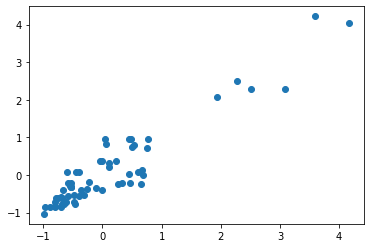

In [112]:
plt.scatter(y_test, y_pred)

In [113]:
error = y_test-y_pred

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

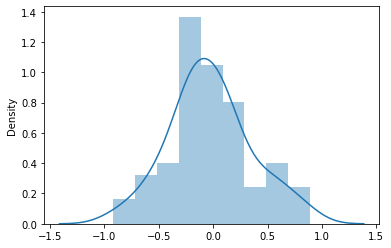

In [114]:
sns.distplot(error)